# Importing Libraries

In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Loading the Database

In [25]:
df = pd.read_csv('./data/diabetes.csv')

In [26]:
df.shape

(768, 9)

In [27]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


# Cleaning

<Axes: >

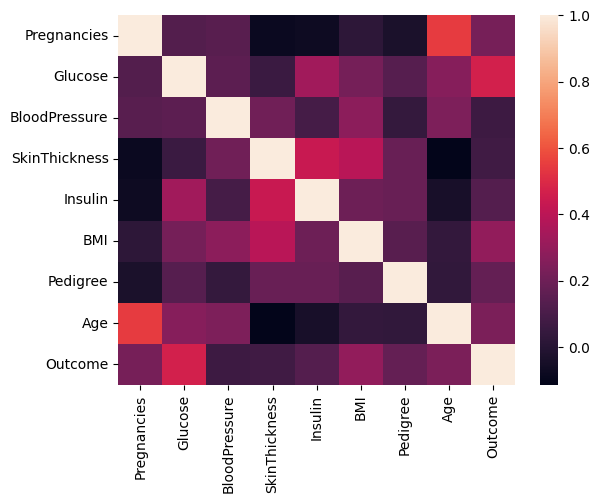

In [28]:
sns.heatmap(df.corr())  # Correlation Matrix

In [29]:
df.drop(['BloodPressure', 'SkinThickness'], axis=1, inplace=True)  # Dropping irrelevant columns

Dropping 'BloodPressure' and 'SkinThickness' columns because of their weak correlation with the 'outcome' variable

In [30]:
df.isna().sum()

Pregnancies    0
Glucose        0
Insulin        0
BMI            0
Pedigree       0
Age            0
Outcome        0
dtype: int64

No null values

# Separating the Features and the Labels

In [31]:
X=df.drop(['Outcome'],axis=1)

y=df['Outcome']


,Pregnancies,Glucose,Insulin,BMI,Pedigree,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63
764,2,122,0,36.8,0.340,27
765,5,121,112,26.2,0.245,30
766,1,126,0,30.1,0.349,47


# Splitting the Dataset

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling

In [34]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

This code is using the StandardScaler from scikit-learn to standardize (normalize) the feature data in a machine learning dataset, separately for the training and testing sets

# KNN Model

In [35]:
scores = []
for k in range(1,10):
    knn = KNeighborsClassifier(k).fit(X_train, y_train)  # Training mode for each value of k
    scores.append(knn.score(X_train, y_train))  # Adding score of each k to scores list

This loop will tell us which k value is giving us best accuracy in the range (1-20)

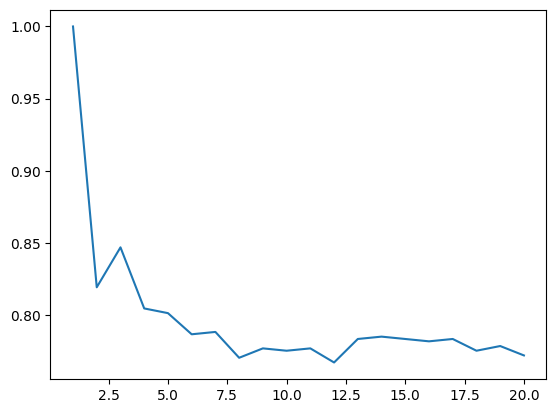

In [36]:
plt.plot(np.arange(1,10), scores)  # Plotting: k vs score
plt.show()

Observation : k = 3, gives the highest accuracy

In [37]:
def knn(X_train, X_test, y_train, y_test, k):  # Function to perform all tasks
    
    knn_model = KNeighborsClassifier(n_neighbors=k)  # KNN Model
    
    knn_model.fit(X_train, y_train)  # Training Model
    y_pred=knn_model.predict(X_test) # Making predictions
    
    print(f"Accuracy \t: {accuracy_score(y_test, y_pred)}")  # Accuracy
    print()
    
    cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix
    print("Confusion Matrix")
    print(cm)
    print()
    
    cr = classification_report(y_test, y_pred)  # Classification Report
    print('Classification report : \n', cr)

# Results 

In [38]:
k = 3

In [39]:
knn(X_train, X_test, y_train, y_test, k)  

Accuracy 	: 0.7207792207792207

Confusion Matrix
[[85 22]
 [21 26]]

Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       107
           1       0.54      0.55      0.55        47

    accuracy                           0.72       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.72      0.72      0.72       154

